In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from matplotlib import pyplot as plt

In [2]:
# Specify the path to the main directory
main_directory = '105_classes_pins_dataset'

# Initialize counts
folder_count = 0
total_file_count = 0

# Iterate through the main directory
for root, dirs, files in os.walk(main_directory):
    # Count folders
    folder_count += len(dirs)
    
    # Count files in each folder
    folder_file_count = len(files)
    total_file_count += folder_file_count
    
    # Print the folder name and the number of files in that folder
    print(f"Folder: {os.path.basename(root)}, Files: {folder_file_count}")

# Print the overall results
print(f"\nNumber of folders: {folder_count}")
print(f"Total number of files: {total_file_count}")

Folder: 105_classes_pins_dataset, Files: 0
Folder: pins_Adriana Lima, Files: 213
Folder: pins_Alex Lawther, Files: 152
Folder: pins_Alexandra Daddario, Files: 225
Folder: pins_Alvaro Morte, Files: 139
Folder: pins_alycia dabnem carey, Files: 211
Folder: pins_Amanda Crew, Files: 117
Folder: pins_amber heard, Files: 218
Folder: pins_Andy Samberg, Files: 196
Folder: pins_Anne Hathaway, Files: 203
Folder: pins_Anthony Mackie, Files: 124
Folder: pins_Avril Lavigne, Files: 162
Folder: pins_barack obama, Files: 119
Folder: pins_barbara palvin, Files: 197
Folder: pins_Ben Affleck, Files: 126
Folder: pins_Bill Gates, Files: 122
Folder: pins_Bobby Morley, Files: 138
Folder: pins_Brenton Thwaites, Files: 209
Folder: pins_Brian J. Smith, Files: 102
Folder: pins_Brie Larson, Files: 169
Folder: pins_camila mendes, Files: 162
Folder: pins_Chris Evans, Files: 166
Folder: pins_Chris Hemsworth, Files: 159
Folder: pins_Chris Pratt, Files: 176
Folder: pins_Christian Bale, Files: 154
Folder: pins_Cristiano

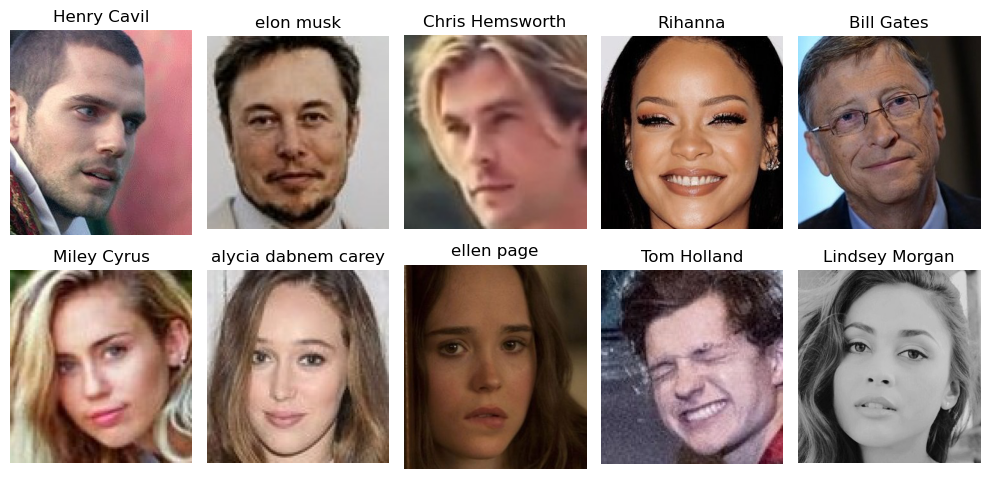

In [3]:
# Specify the path to the main directory
main_directory = '105_classes_pins_dataset'

# Get a list of all folders
all_folders = [folder for folder in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, folder))]

# Randomly pick 10 folders
selected_folders = random.sample(all_folders, 10)

# Create a 2x5 grid for displaying images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Iterate through selected folders and display one random image from each folder
for i, folder in enumerate(selected_folders):
    folder_path = os.path.join(main_directory, folder)
    all_images = [img for img in os.listdir(folder_path) if img.endswith('.jpg')]
    
    # Randomly pick one image
    selected_image = random.choice(all_images)
    
    # Get the full path to the selected image
    image_path = os.path.join(folder_path, selected_image)
    
    # Read and display the image
    img = mpimg.imread(image_path)
    axes[i // 5, i % 5].imshow(img)
    axes[i // 5, i % 5].axis('off')
    
    # Extract label from folder name and drop the first 5 characters
    label = folder[5:]
    axes[i // 5, i % 5].set_title(label)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [4]:
#!pip install mtcnn




1/1 [==============================] - 0s 465ms/step


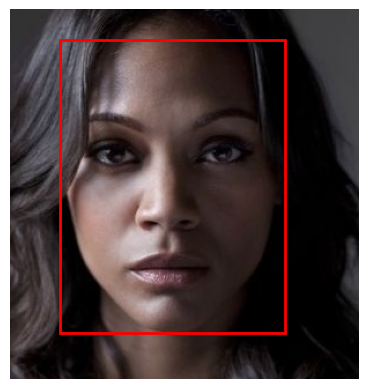

In [4]:
import matplotlib.patches as patches
from mtcnn import MTCNN

# Function to perform face detection and display the image with bounding boxes
def detect_and_display_faces(image_path):
    # Load the image
    img = cv2.imread(image_path)
    
    # Convert the image to RGB for compatibility with MTCNN
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Load the pre-trained MTCNN model
    detector = MTCNN()
    
    # Perform face detection
    faces = detector.detect_faces(img_rgb)
    
    # Display the original image
    fig, ax = plt.subplots()
    ax.imshow(img_rgb)
    
    # Add bounding boxes for each detected face
    for face in faces:
        x, y, w, h = face['box']
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    
    plt.axis('off')
    plt.show()

# Specify the path to the main directory
main_directory = '105_classes_pins_dataset'

# Get a list of all folders
all_folders = [folder for folder in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, folder))]

# Randomly pick a folder
selected_folder = random.choice(all_folders)
folder_path = os.path.join(main_directory, selected_folder)

# Get a list of all images in the selected folder
all_images = [img for img in os.listdir(folder_path) if img.endswith('.jpg')]

# Randomly pick an image from the folder
selected_image = random.choice(all_images)
image_path = os.path.join(folder_path, selected_image)

# Perform face detection using MTCNN and display the result
detect_and_display_faces(image_path)

In [5]:
import os
import shutil

# Set the directory path
directory_path = 'working'

# Remove all files and subdirectories in the directory
for item in os.listdir(directory_path):
    item_path = os.path.join(directory_path, item)
    if os.path.isfile(item_path) or os.path.islink(item_path):
        os.unlink(item_path)
    elif os.path.isdir(item_path):
        shutil.rmtree(item_path)

print("Contents of the working directory cleared.")

Contents of the working directory cleared.


In [6]:
import shutil

# Source directory
source_directory = '105_classes_pins_dataset'

# Destination directory
destination_directory = 'working'

# Create train and test directories if not exist
train_directory = os.path.join(destination_directory, 'train')
os.makedirs(train_directory, exist_ok=True)


# Get a list of all folders in the source directory
all_folders = [folder for folder in os.listdir(source_directory) if os.path.isdir(os.path.join(source_directory, folder))]

# Iterate through each folder
for folder in all_folders:
    folder_path = os.path.join(source_directory, folder)
    
    # Get a list of all images in the folder
    all_images = [img for img in os.listdir(folder_path) if img.endswith('.jpg')]
    
    # Create a label for the folder (drop the first 5 characters)
    label = folder[5:]
    
    # Shuffle the images
    random.shuffle(all_images)
    
    # Move the first 85 images to the train directory
    for i in range(85):
        image_path = os.path.join(folder_path, all_images[i])
        destination_path = os.path.join(train_directory, label, all_images[i])
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        shutil.copy(image_path, destination_path)
    

print("Data splitting completed.")

Data splitting completed.


1/1 [==============================] - 0s 379ms/step


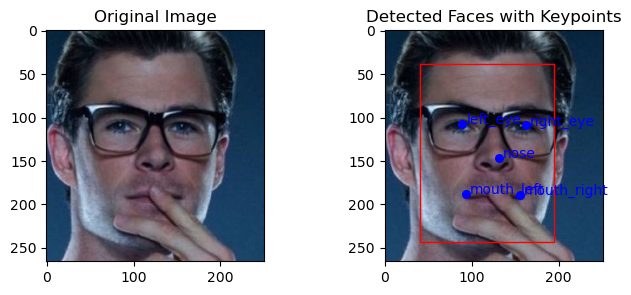

Metadata of detected faces in Chris Hemsworth/Chris Hemsworth152_415.jpg:
Face 1:
   Confidence: 1.00
   Bounding Box: [40, 38, 155, 205]
   Keypoints: {'left_eye': (89, 107), 'right_eye': (162, 109), 'nose': (131, 146), 'mouth_left': (93, 188), 'mouth_right': (155, 189)}

1/1 [==============================] - 0s 78ms/step


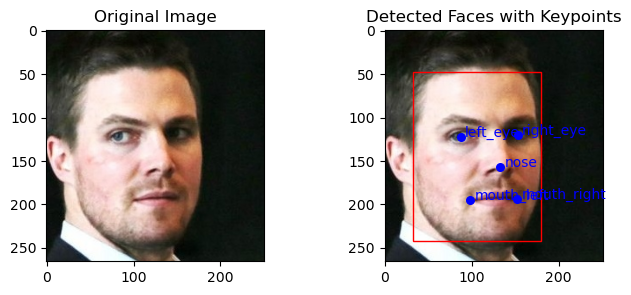

Metadata of detected faces in Stephen Amell/Stephen Amell188_4150.jpg:
Face 1:
   Confidence: 1.00
   Bounding Box: [32, 48, 148, 194]
   Keypoints: {'left_eye': (87, 122), 'right_eye': (153, 120), 'nose': (133, 157), 'mouth_left': (98, 195), 'mouth_right': (152, 194)}



In [7]:
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

# Directory paths
train_directory = 'working/train'

# Get a list of all folders in the train directory
all_folders = [folder for folder in os.listdir(train_directory) if os.path.isdir(os.path.join(train_directory, folder))]

# Randomly select two folders
selected_folders = random.sample(all_folders, 2)

# Initialize MTCNN detector
detector = MTCNN()

# Iterate through selected folders
for folder in selected_folders:
    folder_path = os.path.join(train_directory, folder)
    
    # Get a list of all images in the folder
    all_images = [img for img in os.listdir(folder_path) if img.endswith('.jpg')]
    
    # Randomly select one image
    selected_image = random.choice(all_images)
    image_path = os.path.join(folder_path, selected_image)
    
    # Read the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Detect faces using MTCNN
    faces = detector.detect_faces(image)
    
    # Display image with bounding boxes around detected faces
    plt.figure(figsize=(8, 3))
    
    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image')
    
    # Display image with bounding boxes
    plt.subplot(1, 2, 2)
    plt.imshow(image_rgb)
    
    for face in faces:
        x, y, width, height = face['box']
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        plt.gca().add_patch(rect)
        
        # Display additional keypoints
        for key, value in face['keypoints'].items():
            plt.scatter(value[0], value[1], s=30, color='blue', marker='o')
            plt.text(value[0] + 5, value[1], key, color='blue')
    
    plt.title('Detected Faces with Keypoints')
    plt.show()

    # Display metadata of detected faces
    print(f"Metadata of detected faces in {folder}/{selected_image}:")
    for i, face in enumerate(faces):
        print(f"Face {i + 1}:")
        print(f"   Confidence: {face['confidence']:.2f}")
        print(f"   Bounding Box: {face['box']}")
        print(f"   Keypoints: {face['keypoints']}")
        print()

In [9]:
#!pip install facenet-pytorch

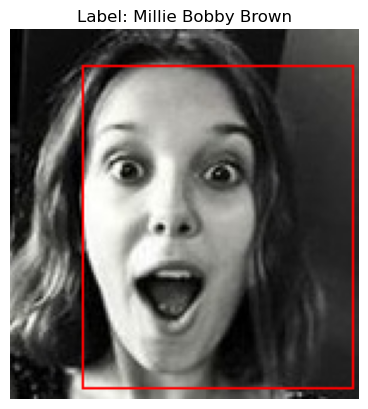

Embeddings for Detected Face 1: [ 5.71297370e-02 -2.67934948e-02  3.81031856e-02  2.27163546e-02
  3.57267410e-02 -6.98381066e-02 -2.50966903e-02 -3.76983196e-03
 -2.96353945e-03 -5.07798344e-02 -8.72919708e-02 -6.77055344e-02
 -9.40293223e-02 -2.22640000e-02  7.56724328e-02 -2.69111544e-02
  5.44652343e-04  1.07508589e-04  3.00200358e-02  2.49170102e-02
  1.88040566e-02  2.91414633e-02 -5.01331575e-02 -1.18766641e-02
  1.39893349e-02 -3.66233126e-03  7.53469244e-02 -1.79457758e-02
  2.41288971e-02 -8.23454484e-02 -2.90093310e-02  5.40296882e-02
  2.29179431e-02  4.32333685e-02  6.66124374e-02  1.38067510e-02
 -4.40900922e-02  3.39963213e-02 -3.49919535e-02  2.30008345e-02
  8.09066556e-03  5.58163133e-03 -8.46079434e-04 -1.09960034e-01
 -2.18510404e-02 -6.12194985e-02  2.36308556e-02 -3.42507139e-02
 -4.37819436e-02  3.52482423e-02  1.08578905e-01  6.88848719e-02
  5.53716980e-02  7.22644106e-02 -8.98449216e-03 -6.90328181e-02
  4.13697958e-02  6.15122542e-02  3.99996946e-03  2.585360

In [8]:
from facenet_pytorch import MTCNN, InceptionResnetV1, extract_face
from PIL import Image

# Function to process image, detect face, and calculate embeddings
def process_image(image_path, face_detector, face_embedder, label):
    # Read the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect faces using MTCNN
    boxes, probs = face_detector.detect(image_rgb)

    if boxes is not None:
        # Display label of the image using the folder it is picked up from
        plt.title(f"Label: {label}")

        # Display original image
        plt.imshow(Image.fromarray(image_rgb))

        # Draw a rectangle around each detected face on the original image
        for i, box in enumerate(boxes):
            x, y, w, h = box
            # Draw a rectangle around the detected face with thinner lines
            cv2.rectangle(image_rgb, (int(x), int(y)), (int(x + w), int(y + h)), (255, 0, 0), 1)

        # Display the image with the rectangles around detected faces
        plt.imshow(Image.fromarray(image_rgb))

        plt.axis('off')
        plt.show()

        # Apply transformations and normalization
        transformed_faces = [face_embedder(extract_face(image_rgb, box).unsqueeze(0)) for box in boxes]

        # Convert PyTorch tensor to NumPy array
        transformed_faces_np = [transformed_face.squeeze().detach().numpy() for transformed_face in transformed_faces]

        # Print the embeddings
        for i, embeddings in enumerate(transformed_faces_np):
            print(f"Embeddings for Detected Face {i + 1}:", embeddings)

# Directory paths
train_directory = 'working/train/'

# Randomly pick a folder
selected_folder = random.choice(os.listdir(train_directory))
selected_folder_path = os.path.join(train_directory, selected_folder)

# Randomly pick one file from the selected folder
file = random.choice(os.listdir(selected_folder_path))
file_path = os.path.join(selected_folder_path, file)

# Initialize MTCNN for face detection with adjusted parameters
face_detector = MTCNN(margin=20, post_process=False, select_largest=False)
   
# Initialize InceptionResnetV1 for face embedding
face_embedder = InceptionResnetV1(pretrained='vggface2').eval()

# Process image, detect faces, calculate embeddings, and display results
process_image(file_path, face_detector, face_embedder, label=selected_folder)

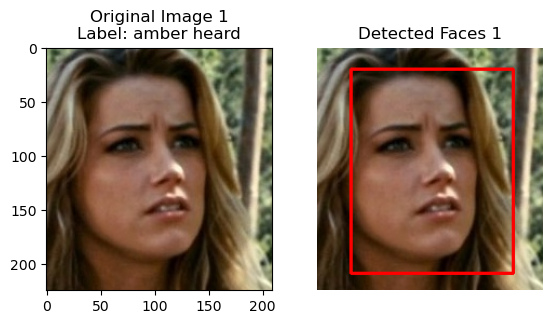

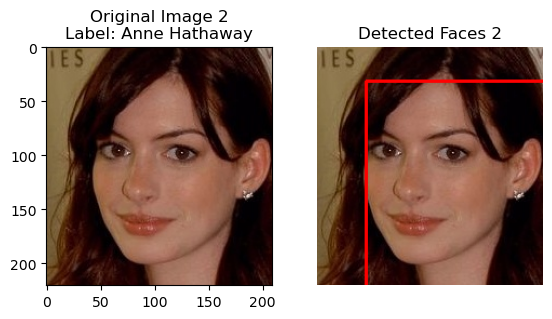

Distance between embeddings: 0.3837


In [9]:
from facenet_pytorch import MTCNN, InceptionResnetV1, extract_face
from PIL import Image
from sklearn.metrics.pairwise import euclidean_distances

# Function to process images, detect faces, and calculate embeddings
def process_images(folder_path1, file1, folder_path2, file2, face_detector, face_embedder):
    # Read the images
    image1_path = os.path.join(folder_path1, file1)
    image2_path = os.path.join(folder_path2, file2)

    image1 = cv2.imread(image1_path)
    image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

    image2 = cv2.imread(image2_path)
    image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

    # Detect faces using MTCNN
    faces1, _ = face_detector.detect(image1_rgb)
    faces2, _ = face_detector.detect(image2_rgb)

    # Get labels from folder names
    label1 = os.path.basename(folder_path1)
    label2 = os.path.basename(folder_path2)

    # Display original images with rectangles around detected faces
    plt.subplot(1, 2, 1)
    plt.imshow(Image.fromarray(image1_rgb))
    plt.title(f"Original Image 1\nLabel: {label1}")

    for i, face in enumerate(faces1):
        x, y, w, h = face
        # Draw a rectangle around the detected face
        cv2.rectangle(image1_rgb, (int(x), int(y)), (int(x+w), int(y+h)), (255, 0, 0), 2)

    plt.subplot(1, 2, 2)
    plt.imshow(Image.fromarray(image1_rgb))
    plt.title(f"Detected Faces 1")
    plt.axis('off')

    plt.show()

    plt.subplot(1, 2, 1)
    plt.imshow(Image.fromarray(image2_rgb))
    plt.title(f"Original Image 2\nLabel: {label2}")

    for i, face in enumerate(faces2):
        x, y, w, h = face
        # Draw a rectangle around the detected face
        cv2.rectangle(image2_rgb, (int(x), int(y)), (int(x+w), int(y+h)), (255, 0, 0), 2)

    plt.subplot(1, 2, 2)
    plt.imshow(Image.fromarray(image2_rgb))
    plt.title(f"Detected Faces 2")
    plt.axis('off')

    plt.show()

    # Calculate embeddings for the first image
    embeddings1 = [face_embedder(extract_face(image1_rgb, face).unsqueeze(0)).squeeze().detach().numpy() for face in faces1]

    # Print the embeddings for the first image
    #for i, embeddings in enumerate(embeddings1):
     #   print(f"Embeddings for Detected Face {i + 1} in Image 1:", embeddings)

    # Calculate embeddings for the second image
    embeddings2 = [face_embedder(extract_face(image2_rgb, face).unsqueeze(0)).squeeze().detach().numpy() for face in faces2]

    # Print the embeddings for the second image
   # for i, embeddings in enumerate(embeddings2):
    #    print(f"Embeddings for Detected Face {i + 1} in Image 2:", embeddings)

    # Calculate distance between the two embeddings
    distance = euclidean_distances(embeddings1[0].reshape(1, -1), embeddings2[0].reshape(1, -1))[0][0]

    # Display the distance between the two embeddings
    print(f"Distance between embeddings: {distance:.4f}")

# Directory paths
train_directory = 'working/train/'

# Randomly pick two folders
selected_folders = random.sample(os.listdir(train_directory), 2)

# Randomly pick one file from each selected folder
file1 = random.choice(os.listdir(os.path.join(train_directory, selected_folders[0])))
file2 = random.choice(os.listdir(os.path.join(train_directory, selected_folders[1])))

# Initialize MTCNN for face detection
face_detector = MTCNN(keep_all=True)

# Initialize InceptionResnetV1 for face embedding
face_embedder = InceptionResnetV1(pretrained='vggface2').eval()

# Process images, detect faces, calculate embeddings, and display results
process_images(
    os.path.join(train_directory, selected_folders[0]),
    file1,
    os.path.join(train_directory, selected_folders[1]),
    file2,
    face_detector,
    face_embedder
)

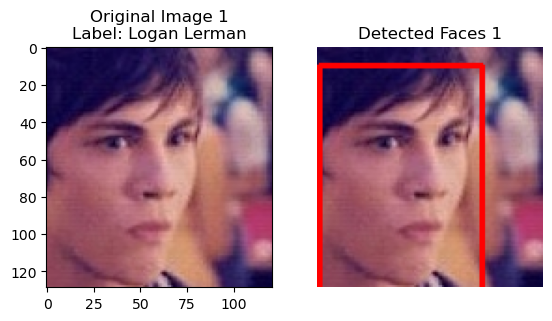

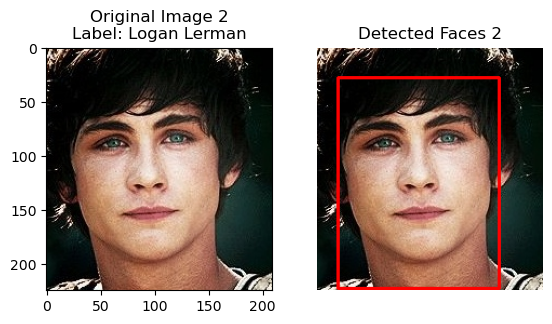

Distance between embeddings: 0.3055


In [10]:
from facenet_pytorch import MTCNN, InceptionResnetV1, extract_face
from PIL import Image
from sklearn.metrics.pairwise import euclidean_distances

# Function to process images, detect faces, and calculate embeddings
def process_images(folder_path, face_detector, face_embedder):
    # Randomly pick two files from the selected folder
    files = random.sample(os.listdir(folder_path), 2)
    
    # Read the images
    image1_path = os.path.join(folder_path, files[0])
    image2_path = os.path.join(folder_path, files[1])

    image1 = cv2.imread(image1_path)
    image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

    image2 = cv2.imread(image2_path)
    image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

    # Detect faces using MTCNN
    faces1, _ = face_detector.detect(image1_rgb)
    faces2, _ = face_detector.detect(image2_rgb)

    # Get the label from the folder name
    label = os.path.basename(folder_path)

    # Display original images with rectangles around detected faces
    plt.subplot(1, 2, 1)
    plt.imshow(Image.fromarray(image1_rgb))
    plt.title(f"Original Image 1\nLabel: {label}")

    for i, face in enumerate(faces1):
        x, y, w, h = face
        # Draw a rectangle around the detected face
        cv2.rectangle(image1_rgb, (int(x), int(y)), (int(x+w), int(y+h)), (255, 0, 0), 2)

    plt.subplot(1, 2, 2)
    plt.imshow(Image.fromarray(image1_rgb))
    plt.title(f"Detected Faces 1")
    plt.axis('off')

    plt.show()

    plt.subplot(1, 2, 1)
    plt.imshow(Image.fromarray(image2_rgb))
    plt.title(f"Original Image 2\nLabel: {label}")

    for i, face in enumerate(faces2):
        x, y, w, h = face
        # Draw a rectangle around the detected face
        cv2.rectangle(image2_rgb, (int(x), int(y)), (int(x+w), int(y+h)), (255, 0, 0), 2)

    plt.subplot(1, 2, 2)
    plt.imshow(Image.fromarray(image2_rgb))
    plt.title(f"Detected Faces 2")
    plt.axis('off')

    plt.show()

    # Calculate embeddings for the first image
    embeddings1 = [face_embedder(extract_face(image1_rgb, face).unsqueeze(0)).squeeze().detach().numpy() for face in faces1]

    # Print the embeddings for the first image
    #for i, embeddings in enumerate(embeddings1):
     #   print(f"Embeddings for Detected Face {i + 1} in Image 1:", embeddings)

    # Calculate embeddings for the second image
    embeddings2 = [face_embedder(extract_face(image2_rgb, face).unsqueeze(0)).squeeze().detach().numpy() for face in faces2]

    # Print the embeddings for the second image
   # for i, embeddings in enumerate(embeddings2):
    #    print(f"Embeddings for Detected Face {i + 1} in Image 2:", embeddings)

    # Calculate distance between the two embeddings
    distance = euclidean_distances(embeddings1[0].reshape(1, -1), embeddings2[0].reshape(1, -1))[0][0]

    # Display the distance between the two embeddings
    print(f"Distance between embeddings: {distance:.4f}")

# Directory paths
train_directory = 'working/train/'

# Randomly pick one folder
selected_folder = random.choice(os.listdir(train_directory))
selected_folder_path = os.path.join(train_directory, selected_folder)

# Initialize MTCNN for face detection
face_detector = MTCNN(keep_all=True)

# Initialize InceptionResnetV1 for face embedding
face_embedder = InceptionResnetV1(pretrained='vggface2').eval()

# Process images, detect faces, calculate embeddings, and display results
process_images(selected_folder_path, face_detector, face_embedder)

In [11]:
import os
import shutil

# Set the directory path
directory_path = 'working/train_detected_faces'

# Create the directory if it doesn't exist
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
    print(f"Directory '{directory_path}' created.")

# Remove all files and subdirectories in the directory
for item in os.listdir(directory_path):
    item_path = os.path.join(directory_path, item)
    if os.path.isfile(item_path) or os.path.islink(item_path):
        os.unlink(item_path)
    elif os.path.isdir(item_path):
        shutil.rmtree(item_path)

print("Contents of train_detected_face cleared.")


Directory 'working/train_detected_faces' created.
Contents of train_detected_face cleared.


In [12]:
import os
import cv2
import numpy as np

data_directory = 'C:\\Users\\Ifham.Khan\\Desktop\\Final Year Project\\105_classes_pins_dataset'
output_directory = 'C:\\Users\\Ifham.Khan\\Desktop\\Final Year Project\\working\\train_detected_faces'

def detect_faces_and_save(image_paths, output_directory):
    processed_images = []
    images_without_faces = 0

    for i, image_path in enumerate(image_paths):
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Use OpenCV's deep learning-based face detector
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

        if len(faces) > 0:
            # Assuming only one face is detected, adjust the dimensions
            x, y, w, h = faces[0]
            face_roi = img[y:y+h, x:x+w]
            resized_face = cv2.resize(face_roi, (224, 224))

            # Get the original folder name
            folder_name = image_path.split('\\')[-2]
            # Create the output folder if it doesn't exist
            output_folder = os.path.join(output_directory, folder_name)
            os.makedirs(output_folder, exist_ok=True)

            # Save the detected face with the same folder structure
            output_path = os.path.join(output_folder, f"detected_face_{i}.jpg")
            cv2.imwrite(output_path, resized_face)

            processed_images.append(resized_face)
        else:
            images_without_faces += 1

        if i % 50 == 0:
            print(f"{i}/{len(image_paths)} images processed", end='\r', flush=True)

    print(f"\nImages without faces detected/Total images: {images_without_faces}/{len(image_paths)}")
    return np.array(processed_images)

# Create output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Get list of all image paths
all_image_paths = []
for folder_name in os.listdir(data_directory):
    folder_path = os.path.join(data_directory, folder_name)
    if os.path.isdir(folder_path):
        image_paths = [os.path.join(folder_path, image_name) for image_name in os.listdir(folder_path)]
        all_image_paths.extend(image_paths)

X_all_processed = detect_faces_and_save(all_image_paths, output_directory)

print("Face detection and saving complete.")


17500/17534 images processed
Images without faces detected/Total images: 4069/17534
Face detection and saving complete.


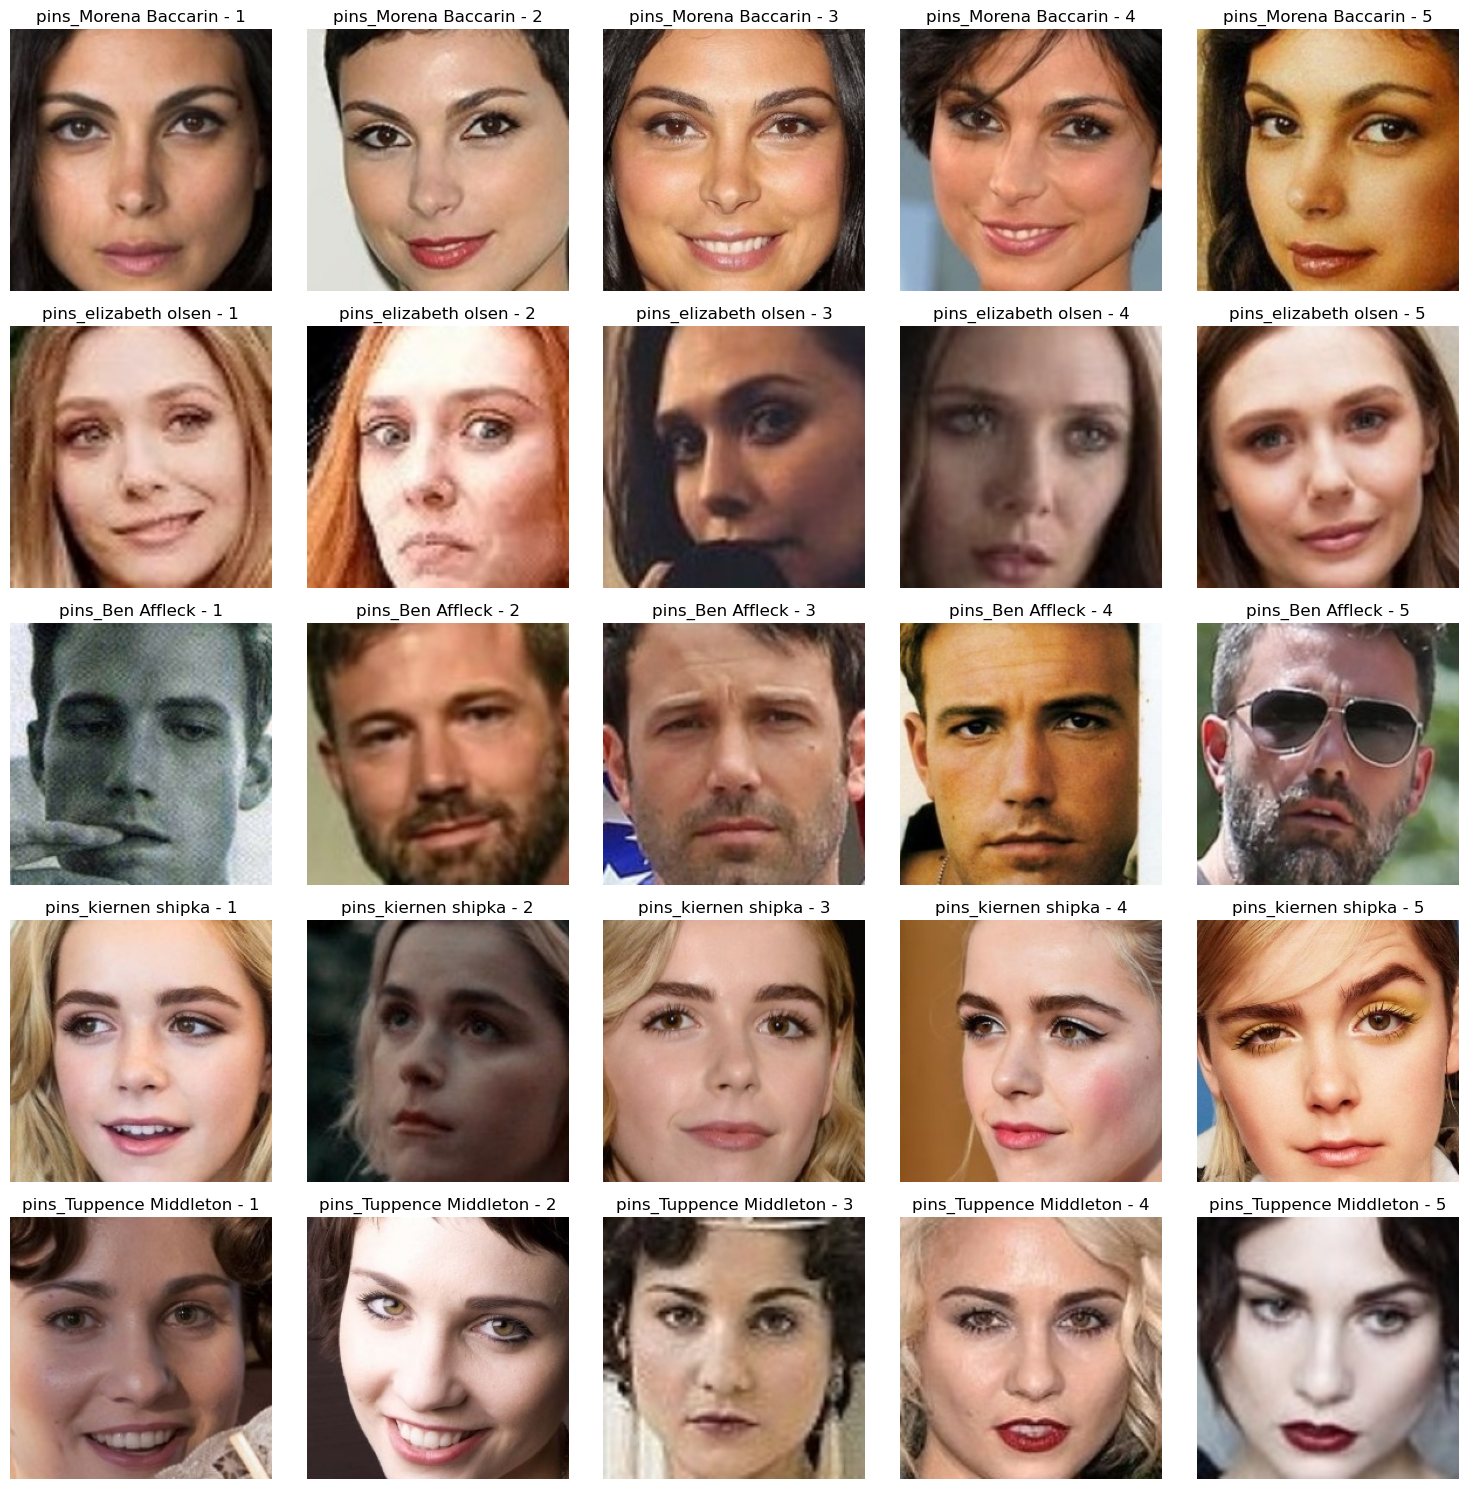

In [13]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Replace this with the path to your detected faces directory
output_directory = 'working/train_detected_faces'

# Get a list of subdirectories (folders) in the output directory
folders = [f for f in os.listdir(output_directory) if os.path.isdir(os.path.join(output_directory, f))]

# Randomly pick five folders (allowing replacement if needed)
selected_folders = np.random.choice(folders, size=min(5, len(folders)), replace=True)

# Set up the subplot
fig, axes = plt.subplots(nrows=len(selected_folders), ncols=5, figsize=(15, 15))

for i, folder_name in enumerate(selected_folders):
    folder_path = os.path.join(output_directory, folder_name)
    image_paths = [os.path.join(folder_path, image_name) for image_name in os.listdir(folder_path)[:5]]

    for j, image_path in enumerate(image_paths):
        # Read the image using OpenCV
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Display the image
        axes[i, j].imshow(img)
        axes[i, j].set_title(f'{folder_name} - {j+1}')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#!pip install facenet-pytorch

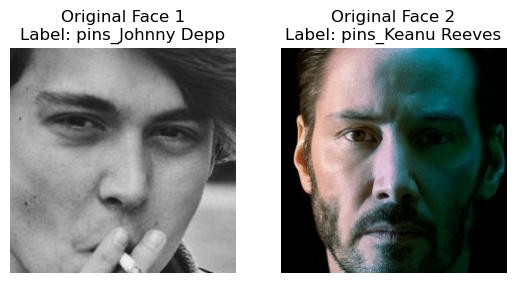

Distance between embeddings: 1.1345


In [14]:
from facenet_pytorch import InceptionResnetV1
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
import torch

# Function to process images and calculate embeddings
def process_images(face1_path, face2_path, face_embedder):
    # Read the pre-detected face images
    face1 = cv2.imread(face1_path)
    face1_rgb = cv2.cvtColor(face1, cv2.COLOR_BGR2RGB)

    face2 = cv2.imread(face2_path)
    face2_rgb = cv2.cvtColor(face2, cv2.COLOR_BGR2RGB)

    # Get labels from folder names
    label1 = os.path.basename(os.path.dirname(face1_path))
    label2 = os.path.basename(os.path.dirname(face2_path))

    # Display original face images
    plt.subplot(1, 2, 1)
    plt.imshow(Image.fromarray(face1_rgb))
    plt.title(f"Original Face 1\nLabel: {label1}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(Image.fromarray(face2_rgb))
    plt.title(f"Original Face 2\nLabel: {label2}")
    plt.axis('off')

    plt.show()

    # Convert NumPy arrays to PyTorch tensors
    face1_tensor = torch.from_numpy(face1_rgb.transpose(2, 0, 1)).unsqueeze(0).float() / 255.0
    face2_tensor = torch.from_numpy(face2_rgb.transpose(2, 0, 1)).unsqueeze(0).float() / 255.0

    # Calculate embeddings for the first face
    embeddings1 = face_embedder(face1_tensor).detach().numpy()

    # Print the embeddings for the first face
    # print("Embeddings for Face 1:", embeddings1)

    # Calculate embeddings for the second face
    embeddings2 = face_embedder(face2_tensor).detach().numpy()

    # Print the embeddings for the second face
    # print("Embeddings for Face 2:", embeddings2)

    # Calculate distance between the two embeddings
    distance = euclidean_distances(embeddings1.reshape(1, -1), embeddings2.reshape(1, -1))[0][0]

    # Display the distance between the two embeddings
    print(f"Distance between embeddings: {distance:.4f}")

# Directory paths
train_detected_faces_directory = 'working/train_detected_faces'

# Get a list of folders in the train_detected_faces_directory
folders = [f for f in os.listdir(train_detected_faces_directory) if os.path.isdir(os.path.join(train_detected_faces_directory, f))]

# Ensure there are at least two folders
if len(folders) >= 2:
    # Randomly pick two folders
    selected_folders = random.sample(folders, 2)

    # Randomly pick one file from each selected folder
    file1 = random.choice(os.listdir(os.path.join(train_detected_faces_directory, selected_folders[0])))
    file2 = random.choice(os.listdir(os.path.join(train_detected_faces_directory, selected_folders[1])))

    # Full paths for the selected faces
    face1_path = os.path.join(train_detected_faces_directory, selected_folders[0], file1)
    face2_path = os.path.join(train_detected_faces_directory, selected_folders[1], file2)

    # Initialize InceptionResnetV1 for face embedding
    face_embedder = InceptionResnetV1(pretrained='vggface2').eval()

    # Process face images, calculate embeddings, and display results
    process_images(face1_path, face2_path, face_embedder)
else:
    print("Not enough folders in the specified directory.")

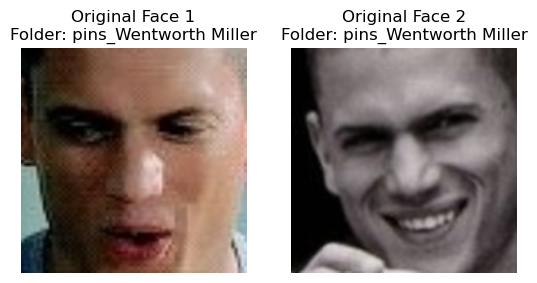

Distance between embeddings: 0.8947


In [15]:
import os
import random
from facenet_pytorch import InceptionResnetV1
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import torch

# Function to process images and calculate embeddings
def process_images(folder_path, face1_file, face2_file, face_embedder):
    # Read the pre-detected face images
    face1_path = os.path.join(folder_path, face1_file)
    face2_path = os.path.join(folder_path, face2_file)

    face1 = cv2.imread(face1_path)
    face1_rgb = cv2.cvtColor(face1, cv2.COLOR_BGR2RGB)

    face2 = cv2.imread(face2_path)
    face2_rgb = cv2.cvtColor(face2, cv2.COLOR_BGR2RGB)

    # Display original face images
    plt.subplot(1, 2, 1)
    plt.imshow(Image.fromarray(face1_rgb))
    plt.title(f"Original Face 1\nFolder: {os.path.basename(folder_path)}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(Image.fromarray(face2_rgb))
    plt.title(f"Original Face 2\nFolder: {os.path.basename(folder_path)}")
    plt.axis('off')

    plt.show()

    # Convert NumPy arrays to PyTorch tensors
    face1_tensor = torch.from_numpy(face1_rgb.transpose(2, 0, 1)).unsqueeze(0).float() / 255.0
    face2_tensor = torch.from_numpy(face2_rgb.transpose(2, 0, 1)).unsqueeze(0).float() / 255.0

    # Calculate embeddings for the first face
    embeddings1 = face_embedder(face1_tensor).detach().numpy()

    # Print the embeddings for the first face
    # print("Embeddings for Face 1:", embeddings1)

    # Calculate embeddings for the second face
    embeddings2 = face_embedder(face2_tensor).detach().numpy()

    # Print the embeddings for the second face
    # print("Embeddings for Face 2:", embeddings2)

    # Calculate distance between the two embeddings
    distance = euclidean_distances(embeddings1.reshape(1, -1), embeddings2.reshape(1, -1))[0][0]

    # Display the distance between the two embeddings
    print(f"Distance between embeddings: {distance:.4f}")

# Directory paths
train_detected_faces_directory = 'working/train_detected_faces'

# Randomly pick one folder
selected_folder = random.choice(os.listdir(train_detected_faces_directory))
folder_path = os.path.join(train_detected_faces_directory, selected_folder)

# Randomly pick two different files from the selected folder
files = random.sample(os.listdir(folder_path), 2)
face1_file, face2_file = files

# Initialize InceptionResnetV1 for face embedding
face_embedder = InceptionResnetV1(pretrained='vggface2').eval()

# Process face images, calculate embeddings, and display results
process_images(folder_path, face1_file, face2_file, face_embedder)

In [16]:
import os

output_directory = 'working/extracted_embeddings'
os.makedirs(output_directory, exist_ok=True)
print(f"Directory '{output_directory}' created.")


Directory 'working/extracted_embeddings' created.


In [17]:
import shutil
import os

folder_path = 'working/extracted_embeddings'

# Check if the folder exists before deleting
if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(f"The folder {folder_path} has been deleted.")
else:
    print(f"The folder {folder_path} does not exist.")

The folder working/extracted_embeddings has been deleted.


In [24]:
import torch
from facenet_pytorch import InceptionResnetV1
from PIL import Image
from torchvision import transforms
from tqdm import tqdm

# Function to extract embeddings from a single folder with data augmentation
def extract_embeddings_from_folder(folder_path, face_embedder, device, output_directory):
    embeddings = {}
    data_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        transforms.RandomRotation(10),
        transforms.ToTensor()
    ])

    label = os.path.basename(folder_path)  # Get the label from the folder name

    for image_name in tqdm(os.listdir(folder_path), desc=f"Processing {folder_path}"):
        image_path = os.path.join(folder_path, image_name)
        try:
            img = Image.open(image_path)

            # Convert image to tensor
            img_tensor = transforms.ToTensor()(img).unsqueeze(0).float().to(device)

            # Calculate embedding
            embedding = face_embedder(img_tensor).squeeze().detach().cpu().numpy()
            embeddings[image_name] = embedding

            # Save the embedding for the original image
            output_emb_path = os.path.join(output_directory, f"{label}_{os.path.splitext(image_name)[0]}_embedding.npy")
            np.save(output_emb_path, embedding)

            # Apply data augmentation
            augmented_img = data_transform(img)

            # Convert augmented image to tensor
            img_tensor_augmented = augmented_img.unsqueeze(0).float().to(device)

            # Calculate embedding for the augmented image
            embedding_augmented = face_embedder(img_tensor_augmented).squeeze().detach().cpu().numpy()
            embeddings[f"{os.path.splitext(image_name)[0]}_augmented_embedding.npy"] = embedding_augmented

            # Save the embedding for the augmented image
            output_emb_path_augmented = os.path.join(output_directory, f"{label}_{os.path.splitext(image_name)[0]}_augmented_embedding.npy")
            np.save(output_emb_path_augmented, embedding_augmented)

        except Exception as e:
            print(f"Error processing {image_name}: {str(e)}")

    return label, embeddings

# Directory paths
input_directory = 'working/train_detected_faces'
output_directory = 'working/extracted_embeddings'

# Initialize InceptionResnetV1 for face embedding
device = 'cpu'
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
face_embedder = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Loop through each folder in the input directory
for folder_name in os.listdir(input_directory):
    folder_path = os.path.join(input_directory, folder_name)

    # Create subfolder in output_directory for the current label
    label_output_directory = os.path.join(output_directory, folder_name)
    os.makedirs(label_output_directory, exist_ok=True)

    # Extract embeddings from the current folder with data augmentation
    label, embeddings = extract_embeddings_from_folder(folder_path, face_embedder, device, label_output_directory)

print("Embeddings extraction complete.")

Processing working/train_detected_faces\pins_Adriana Lima: 100%|█████████████████████| 186/186 [02:04<00:00,  1.50it/s]
Processing working/train_detected_faces\pins_Alex Lawther: 100%|███████████████████████| 86/86 [00:54<00:00,  1.58it/s]
Processing working/train_detected_faces\pins_Alexandra Daddario: 100%|███████████████| 206/206 [02:10<00:00,  1.58it/s]
Processing working/train_detected_faces\pins_Alvaro Morte: 100%|███████████████████████| 94/94 [01:01<00:00,  1.54it/s]
Processing working/train_detected_faces\pins_alycia dabnem carey: 100%|██████████████| 157/157 [01:40<00:00,  1.57it/s]
Processing working/train_detected_faces\pins_Amanda Crew: 100%|██████████████████████| 110/110 [01:09<00:00,  1.59it/s]
Processing working/train_detected_faces\pins_amber heard: 100%|██████████████████████| 166/166 [01:49<00:00,  1.52it/s]
Processing working/train_detected_faces\pins_Andy Samberg: 100%|█████████████████████| 167/167 [01:46<00:00,  1.56it/s]
Processing working/train_detected_faces\

Processing working/train_detected_faces\pins_Mark Zuckerberg: 100%|████████████████████| 81/81 [00:27<00:00,  2.96it/s]
Processing working/train_detected_faces\pins_Megan Fox: 100%|████████████████████████| 173/173 [00:59<00:00,  2.93it/s]
Processing working/train_detected_faces\pins_melissa fumero: 100%|███████████████████| 137/137 [00:47<00:00,  2.87it/s]
Processing working/train_detected_faces\pins_Miley Cyrus: 100%|██████████████████████| 101/101 [00:33<00:00,  2.99it/s]
Processing working/train_detected_faces\pins_Millie Bobby Brown: 100%|███████████████| 139/139 [00:46<00:00,  2.98it/s]
Processing working/train_detected_faces\pins_Morena Baccarin: 100%|██████████████████| 161/161 [00:53<00:00,  2.99it/s]
Processing working/train_detected_faces\pins_Morgan Freeman: 100%|█████████████████████| 57/57 [00:19<00:00,  2.99it/s]
Processing working/train_detected_faces\pins_Nadia Hilker: 100%|███████████████████████| 94/94 [00:32<00:00,  2.92it/s]
Processing working/train_detected_faces\

Embeddings extraction complete.


In [20]:
import os

# Directory path
output_directory = 'working/extracted_embeddings'

# Get folder names and file counts
folders_and_counts = [(folder, len(os.listdir(os.path.join(output_directory, folder)))) for folder in os.listdir(output_directory)]

# Print results
for folder, count in folders_and_counts:
    print(f"Folder: {folder}, Number of Files: {count}")

Folder: pins_Adriana Lima, Number of Files: 372
Folder: pins_Alex Lawther, Number of Files: 172
Folder: pins_Alexandra Daddario, Number of Files: 412
Folder: pins_Alvaro Morte, Number of Files: 188
Folder: pins_alycia dabnem carey, Number of Files: 314
Folder: pins_Amanda Crew, Number of Files: 220
Folder: pins_amber heard, Number of Files: 332
Folder: pins_Andy Samberg, Number of Files: 334
Folder: pins_Anne Hathaway, Number of Files: 314
Folder: pins_Anthony Mackie, Number of Files: 156
Folder: pins_Avril Lavigne, Number of Files: 216
Folder: pins_barack obama, Number of Files: 174
Folder: pins_barbara palvin, Number of Files: 288
Folder: pins_Ben Affleck, Number of Files: 196
Folder: pins_Bill Gates, Number of Files: 138
Folder: pins_Bobby Morley, Number of Files: 138
Folder: pins_Brenton Thwaites, Number of Files: 318
Folder: pins_Brian J. Smith, Number of Files: 156
Folder: pins_Brie Larson, Number of Files: 262
Folder: pins_camila mendes, Number of Files: 260
Folder: pins_Chris E

In [21]:
import shutil

folder_path = 'working/extracted_embeddings'

# Check if the folder exists before deleting
if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(f"The folder {folder_path} has been deleted.")
else:
    print(f"The folder {folder_path} does not exist.")

The folder working/extracted_embeddings has been deleted.


In [25]:
import shutil

source_folder = "working/extracted_embeddings"
destination_folder = "working/extracted_embeddingstest"

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Iterate through each folder in the source directory
for folder_name in os.listdir(source_folder):
    folder_path = os.path.join(source_folder, folder_name)

    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Create the corresponding folder in the destination directory
        destination_folder_path = os.path.join(destination_folder, folder_name)
        os.makedirs(destination_folder_path, exist_ok=True)

        # Get the list of files in the current folder
        files = os.listdir(folder_path)

        # Move the first two files that do not contain "augmented" in their names
        moved_files = 0
        for file_name in files:
            if "augmented" not in file_name:
                source_file_path = os.path.join(folder_path, file_name)
                destination_file_path = os.path.join(destination_folder_path, file_name)

                # Move the file (not copy)
                shutil.move(source_file_path, destination_file_path)
                moved_files += 1

                if moved_files == 2:
                    break  # Break after moving two suitable files

print("Files moved successfully.")

Files moved successfully.


In [ ]:
#!pip install face_recognition

In [ ]:
#!pip install facenet-pytorch numpy scikit-learn

In [26]:
from sklearn.metrics import pairwise_distances

# Function to calculate average embedding for each label
def calculate_average_embeddings(base_folder):
    average_embeddings = {}

    for label_folder in os.listdir(base_folder):
        label_path = os.path.join(base_folder, label_folder)
        if os.path.isdir(label_path):
            label_embeddings = []
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)
                # Load embeddings using your preferred method (e.g., np.load())
                embedding = np.load(file_path)
                label_embeddings.append(embedding)

            # Calculate average embedding for the label
            average_embedding = np.mean(label_embeddings, axis=0)
            average_embeddings[label_folder] = average_embedding

    return average_embeddings

# Function to recognize faces based on existing embeddings
def recognize_faces(test_folder, average_embeddings):
    predictions = []

    for label_folder in os.listdir(test_folder):
        label_path = os.path.join(test_folder, label_folder)
        if os.path.isdir(label_path):
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)

                # Load test embedding from the saved numpy file
                test_embedding = np.load(file_path)

                # Compare test embedding with averaged embeddings
                distances = {}
                for label, avg_embedding in average_embeddings.items():
                    distance = np.linalg.norm(test_embedding - avg_embedding)
                    distances[label] = distance

                # Predict the label with the minimum distance
                predicted_label = min(distances, key=distances.get)
                predictions.append((file_name, label_folder, predicted_label))

    return predictions


# folder paths
base_folder = 'working/extracted_embeddings'
test_folder = 'working/extracted_embeddingstest'

# Load existing average embeddings
average_embeddings = calculate_average_embeddings(base_folder)

# Recognize faces in the test folder
predictions = recognize_faces(test_folder, average_embeddings)

# Print the predictions
for file_name, actual_label, predicted_label in predictions:
    print(f"{file_name}: Actual Label - {actual_label}, Predicted Label - {predicted_label}")

pins_Adriana Lima_detected_face_0_embedding.npy: Actual Label - pins_Adriana Lima, Predicted Label - pins_Adriana Lima
pins_Adriana Lima_detected_face_101_embedding.npy: Actual Label - pins_Adriana Lima, Predicted Label - pins_Adriana Lima
pins_Alex Lawther_detected_face_214_embedding.npy: Actual Label - pins_Alex Lawther, Predicted Label - pins_Alex Lawther
pins_Alex Lawther_detected_face_215_embedding.npy: Actual Label - pins_Alex Lawther, Predicted Label - pins_Alex Lawther
pins_Alexandra Daddario_detected_face_365_embedding.npy: Actual Label - pins_Alexandra Daddario, Predicted Label - pins_Alexandra Daddario
pins_Alexandra Daddario_detected_face_366_embedding.npy: Actual Label - pins_Alexandra Daddario, Predicted Label - pins_Alexandra Daddario
pins_Alvaro Morte_detected_face_590_embedding.npy: Actual Label - pins_Alvaro Morte, Predicted Label - pins_Alvaro Morte
pins_Alvaro Morte_detected_face_591_embedding.npy: Actual Label - pins_Alvaro Morte, Predicted Label - pins_Alvaro Mort

Image not found for 12623. Skipping to the next one.
Image not found for 101. Skipping to the next one.
Image not found for 11207. Skipping to the next one.
Image not found for 6519. Skipping to the next one.
Image not found for 8701. Skipping to the next one.
Image not found for 591. Skipping to the next one.
Image not found for 7804. Skipping to the next one.
Image not found for 15311. Skipping to the next one.
Image not found for 8408. Skipping to the next one.
Image not found for 6893. Skipping to the next one.
Image not found for 7624. Skipping to the next one.
Image not found for 2276. Skipping to the next one.
Image not found for 2873. Skipping to the next one.
Image not found for 3629. Skipping to the next one.
Image not found for 6714. Skipping to the next one.
Image not found for 16171. Skipping to the next one.
Image not found for 729. Skipping to the next one.
Image not found for 730. Skipping to the next one.
Image not found for 8702. Skipping to the next one.
Image not fo

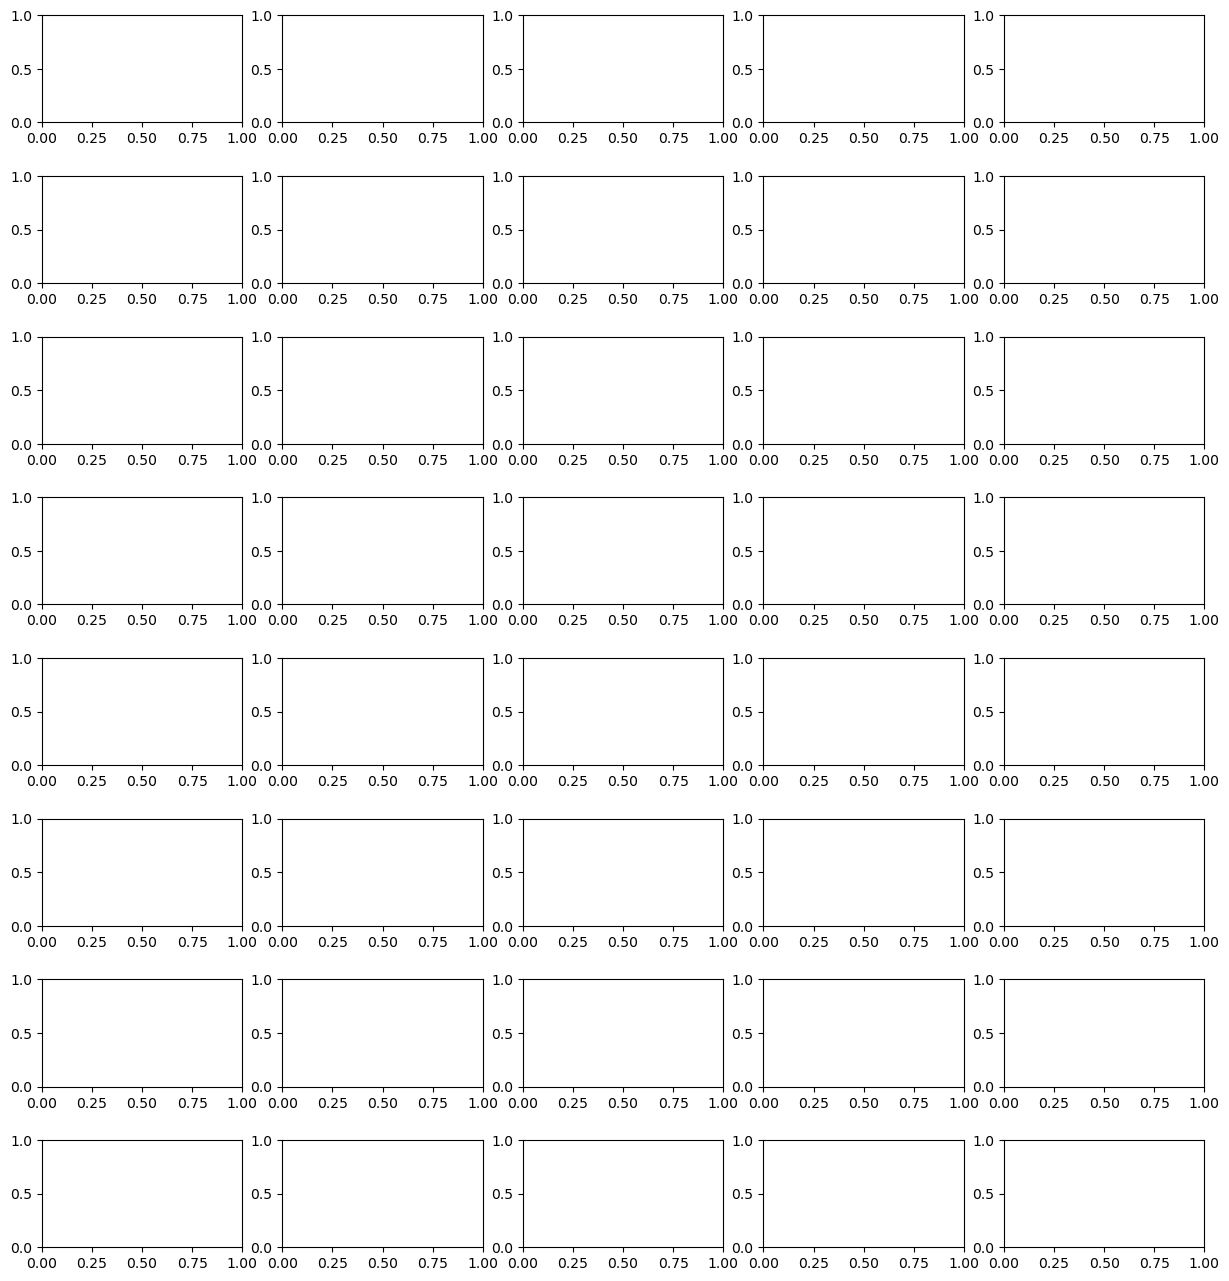

In [27]:
from sklearn.metrics import pairwise_distances
from PIL import Image

# Function to calculate average embedding for each label
def calculate_average_embeddings(base_folder):
    average_embeddings = {}

    for label_folder in os.listdir(base_folder):
        label_path = os.path.join(base_folder, label_folder)
        if os.path.isdir(label_path):
            label_embeddings = []
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)
                # Load embeddings using your preferred method (e.g., np.load())
                embedding = np.load(file_path)
                label_embeddings.append(embedding)

            # Calculate average embedding for the label
            average_embedding = np.mean(label_embeddings, axis=0)
            average_embeddings[label_folder] = average_embedding

    return average_embeddings

# Function to recognize faces based on existing embeddings
def recognize_faces(test_folder, average_embeddings):
    predictions = []

    for label_folder in os.listdir(test_folder):
        label_path = os.path.join(test_folder, label_folder)
        if os.path.isdir(label_path):
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)

                # Load test embedding from the saved numpy file
                test_embedding = np.load(file_path)

                # Compare test embedding with averaged embeddings
                distances = {}
                for label, avg_embedding in average_embeddings.items():
                    distance = np.linalg.norm(test_embedding - avg_embedding)
                    distances[label] = distance

                # Predict the label with the minimum distance
                predicted_label = min(distances, key=distances.get)
                predictions.append((file_name, label_folder, predicted_label))

    return predictions

import random

# Function to display images with actual and predicted labels
def display_random_images(predictions, image_folder, num_images=40):
    selected_predictions = random.sample(predictions, min(num_images, len(predictions)))
    
    # Calculate the number of rows and columns based on the desired number of images
    num_rows = (num_images + 4) // 5  # Ensure at least 1 row
    num_cols = min(5, num_images)  # Maximum of 5 columns
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 2 * num_rows))
    fig.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing

    for i, (file_name, actual_label, predicted_label) in enumerate(selected_predictions):
        # Extract identifier from the file name
        identifier_start = file_name.find("_detected_face_") + len("_detected_face_")
        identifier_end = file_name.find("_", identifier_start)
        if identifier_end == -1:
            identifier = file_name[identifier_start:]
        else:
            identifier = file_name[identifier_start:identifier_end]

        # Construct the file path for the corresponding image
        image_name = f"detected_face_{identifier}.jpg"
        image_path = os.path.join(image_folder, actual_label, image_name)

        # Display the actual image along with labels
        try:
            image = Image.open(image_path)
            axes[i // 5, i % 5].imshow(image)
            axes[i // 5, i % 5].set_title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
            axes[i // 5, i % 5].axis('off')

        except FileNotFoundError:
            print(f"Image not found for {identifier}. Skipping to the next one.")

    plt.show()

display_random_images(predictions, '/kaggle/working/train_detected_faces', num_images=40)

# folder paths
base_folder = 'working/extracted_embeddings'
test_folder = 'working/extracted_embeddingstest'
image_folder = 'working/train_detected_faces'

# Load existing average embeddings
average_embeddings = calculate_average_embeddings(base_folder)

# Recognize faces in the test folder
predictions = recognize_faces(test_folder, average_embeddings)

# Display 10 images with actual and predicted labels
#display_images(predictions, image_folder, num_images=10)

In [29]:
# Display a sample of predictions
print(predictions[:10])


[('pins_Adriana Lima_detected_face_0_embedding.npy', 'pins_Adriana Lima', 'pins_Adriana Lima'), ('pins_Adriana Lima_detected_face_101_embedding.npy', 'pins_Adriana Lima', 'pins_Adriana Lima'), ('pins_Alex Lawther_detected_face_214_embedding.npy', 'pins_Alex Lawther', 'pins_Alex Lawther'), ('pins_Alex Lawther_detected_face_215_embedding.npy', 'pins_Alex Lawther', 'pins_Alex Lawther'), ('pins_Alexandra Daddario_detected_face_365_embedding.npy', 'pins_Alexandra Daddario', 'pins_Alexandra Daddario'), ('pins_Alexandra Daddario_detected_face_366_embedding.npy', 'pins_Alexandra Daddario', 'pins_Alexandra Daddario'), ('pins_Alvaro Morte_detected_face_590_embedding.npy', 'pins_Alvaro Morte', 'pins_Alvaro Morte'), ('pins_Alvaro Morte_detected_face_591_embedding.npy', 'pins_Alvaro Morte', 'pins_Alvaro Morte'), ('pins_alycia dabnem carey_detected_face_729_embedding.npy', 'pins_alycia dabnem carey', 'pins_alycia dabnem carey'), ('pins_alycia dabnem carey_detected_face_730_embedding.npy', 'pins_alyc

In [28]:
def load_test_embeddings(test_folder):
    test_embeddings = []

    for label_folder in os.listdir(test_folder):
        label_path = os.path.join(test_folder, label_folder)
        if os.path.isdir(label_path):
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)

                # Load test embedding from the saved numpy file
                test_embedding = np.load(file_path)
                test_embeddings.append((file_name, label_folder, test_embedding))

    return test_embeddings


# folder paths
base_folder = 'working/extracted_embeddings'
test_folder = 'working/extracted_embeddingstest'

# Load existing average embeddings
average_embeddings = calculate_average_embeddings(base_folder)

# Load test embeddings
test_embeddings = load_test_embeddings(test_folder)

# Randomly pick two test embeddings
random_test_embeddings = random.sample(test_embeddings, 2)

# Print the randomly picked test embeddings
#for file_name, label, test_embedding in random_test_embeddings:
 #   print(f"Randomly Picked Test Embedding ({label}): {test_embedding}")

# Calculate and print distances between the random test embeddings and all average embeddings
for file_name, label, test_embedding in random_test_embeddings:
    print(f"\nDistances for {file_name} ({label}) against Average Embeddings:")
    for avg_label, avg_embedding in average_embeddings.items():
        distance = np.linalg.norm(test_embedding - avg_embedding)
        print(f"  Distance to {avg_label}: {distance}")


Distances for pins_Keanu Reeves_detected_face_8927_embedding.npy (pins_Keanu Reeves) against Average Embeddings:
  Distance to pins_Adriana Lima: 1.0907365083694458
  Distance to pins_Alex Lawther: 1.0727401971817017
  Distance to pins_Alexandra Daddario: 1.212906002998352
  Distance to pins_Alvaro Morte: 0.897905707359314
  Distance to pins_alycia dabnem carey: 1.0393484830856323
  Distance to pins_Amanda Crew: 1.0917949676513672
  Distance to pins_amber heard: 1.1675137281417847
  Distance to pins_Andy Samberg: 1.0244650840759277
  Distance to pins_Anne Hathaway: 1.239278793334961
  Distance to pins_Anthony Mackie: 1.282767415046692
  Distance to pins_Avril Lavigne: 1.2021830081939697
  Distance to pins_barack obama: 1.1130152940750122
  Distance to pins_barbara palvin: 1.106818675994873
  Distance to pins_Ben Affleck: 0.8154085874557495
  Distance to pins_Bill Gates: 1.2312308549880981
  Distance to pins_Bobby Morley: 0.8664924502372742
  Distance to pins_Brenton Thwaites: 0.902674

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Disable CUDA
torch.cuda.is_available = lambda : False

# Set the device to CPU
device = torch.device("cpu")

# Load embeddings and labels
data_dir = "working/extracted_embeddings"
embeddings = []
labels = []

for label_folder in os.listdir(data_dir):
    label_path = os.path.join(data_dir, label_folder)
    if os.path.isdir(label_path):
        label = label_folder  # Assuming the folder names are labels
        embeddings_per_label = [] 

        for file_name in os.listdir(label_path):
            file_path = os.path.join(label_path, file_name)
            if file_name.endswith(".npy"):
                embedding = np.load(file_path)
                embeddings_per_label.append(embedding)
                labels.append(label)

        embeddings.append(embeddings_per_label)

# Flatten the embeddings list
embeddings = [item for sublist in embeddings for item in sublist]

# Convert data to PyTorch tensors
X = torch.tensor(embeddings, dtype=torch.float32)
labels = np.array(labels)

# Use LabelEncoder to encode string labels into integers
label_encoder = LabelEncoder()
y = torch.tensor(label_encoder.fit_transform(labels), dtype=torch.long)

# Split the data into 80% training, 10% validation, and 10% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define an updated model with more layers
class UpdatedModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(UpdatedModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(128, 64)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

# Initialize the model
input_size = X_train.shape[1]
num_classes = len(set(y_train))
model = UpdatedModel(input_size, num_classes).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20
batch_size = 32

for epoch in range(num_epochs):
    model.train()
    for i in range(0, len(X_train), batch_size):
        inputs = X_train[i:i+batch_size].to(device)
        labels = y_train[i:i+batch_size].to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_inputs = X_val.to(device)
        val_labels = y_val.to(device)

        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")

# Evaluation on the test data
model.eval()
with torch.no_grad():
    test_inputs = X_test.to(device)
    test_labels = y_test.to(device)

    test_outputs = model(test_inputs)
    test_loss = criterion(test_outputs, test_labels)

# Decode the predicted labels using inverse_transform
predicted_labels = label_encoder.inverse_transform(torch.argmax(test_outputs, dim=1).cpu().numpy())

# Decode the true labels using inverse_transform
true_labels = label_encoder.inverse_transform(y_test.cpu().numpy())

# Display classification report and confusion matrix
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

#print("Confusion Matrix:")
#print(confusion_matrix(true_labels, predicted_labels))

C:\Users\Ifham.Khan\AppData\Local\Temp\ipykernel_7464\3096603719.py:39: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:264.)
  X = torch.tensor(embeddings, dtype=torch.float32)


Epoch 1/20, Train Loss: 1.1412, Validation Loss: 1.3178
Epoch 2/20, Train Loss: 0.6614, Validation Loss: 0.7568
Epoch 3/20, Train Loss: 0.4601, Validation Loss: 0.5850
Epoch 4/20, Train Loss: 0.3778, Validation Loss: 0.4945
Epoch 5/20, Train Loss: 0.3405, Validation Loss: 0.4458
Epoch 6/20, Train Loss: 0.3273, Validation Loss: 0.4145
Epoch 7/20, Train Loss: 0.3195, Validation Loss: 0.3889
Epoch 8/20, Train Loss: 0.3022, Validation Loss: 0.3683
Epoch 9/20, Train Loss: 0.2806, Validation Loss: 0.3599
Epoch 10/20, Train Loss: 0.2503, Validation Loss: 0.3586
Epoch 11/20, Train Loss: 0.2537, Validation Loss: 0.3603
Epoch 12/20, Train Loss: 0.2762, Validation Loss: 0.3651
Epoch 13/20, Train Loss: 0.2950, Validation Loss: 0.3817
Epoch 14/20, Train Loss: 0.1758, Validation Loss: 0.4054
Epoch 15/20, Train Loss: 0.1757, Validation Loss: 0.4104
Epoch 16/20, Train Loss: 0.1522, Validation Loss: 0.3856
Epoch 17/20, Train Loss: 0.1891, Validation Loss: 0.3679
Epoch 18/20, Train Loss: 0.1751, Validat

In [ ]:
#pip install facenet-pytorch opencv-python matplotlib


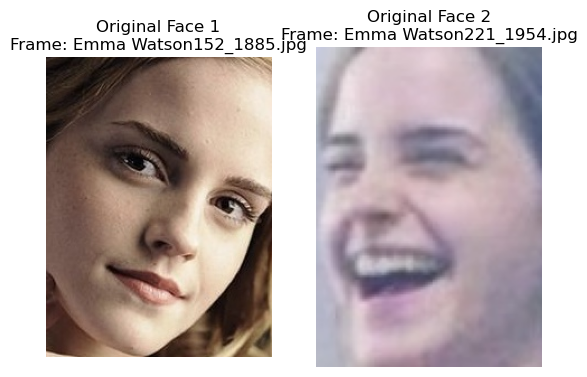

Distance between embeddings: 1.0611
Predicted actor: pins_Emma Watson


In [39]:
import os
import random
from facenet_pytorch import InceptionResnetV1, MTCNN
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import torch

# Function to load actor embeddings and names
def load_actor_data(embeddings_directory):
    actor_embeddings = []
    actor_names = []

    for actor_folder in os.listdir(embeddings_directory):
        actor_folder_path = os.path.join(embeddings_directory, actor_folder)

        # Assuming each actor's folder contains files like "pins_ActorName_detected_face_*.npy"
        for embedding_file in os.listdir(actor_folder_path):
            embedding_file_path = os.path.join(actor_folder_path, embedding_file)

            # Load the embedding
            embedding = np.load(embedding_file_path)

            # Append the embedding and actor name
            actor_embeddings.append(embedding)
            actor_names.append(actor_folder)

    return np.array(actor_embeddings), np.array(actor_names)

# Function to process images and calculate embeddings
def process_images(frames_directory, face_embedder, mtcnn, actor_embeddings, actor_names):
    # List all files in the frames directory
    frame_files = os.listdir(frames_directory)

    # Pick two random files from the frames directory
    face1_file, face2_file = np.random.choice(frame_files, 2, replace=False)

    # Read the face images
    face1_path = os.path.join(frames_directory, face1_file)
    face2_path = os.path.join(frames_directory, face2_file)

    face1 = cv2.imread(face1_path)
    face1_rgb = cv2.cvtColor(face1, cv2.COLOR_BGR2RGB)

    face2 = cv2.imread(face2_path)
    face2_rgb = cv2.cvtColor(face2, cv2.COLOR_BGR2RGB)

    # Perform face detection using MTCNN
    boxes1, probs1 = mtcnn.detect(face1_rgb)
    boxes2, probs2 = mtcnn.detect(face2_rgb)

    if boxes1 is not None and boxes2 is not None:
        # Extract faces using the bounding boxes
        face1_box = boxes1[0].astype(int)
        face1_rgb = face1_rgb[face1_box[1]:face1_box[3], face1_box[0]:face1_box[2]]

        face2_box = boxes2[0].astype(int)
        face2_rgb = face2_rgb[face2_box[1]:face2_box[3], face2_box[0]:face2_box[2]]

        # Display original face images
        plt.subplot(1, 2, 1)
        plt.imshow(Image.fromarray(face1_rgb))
        plt.title(f"Original Face 1\nFrame: {face1_file}")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(Image.fromarray(face2_rgb))
        plt.title(f"Original Face 2\nFrame: {face2_file}")
        plt.axis('off')

        plt.show()

        # Convert NumPy arrays to PyTorch tensors
        face1_tensor = torch.from_numpy(face1_rgb.transpose(2, 0, 1)).unsqueeze(0).float() / 255.0
        face2_tensor = torch.from_numpy(face2_rgb.transpose(2, 0, 1)).unsqueeze(0).float() / 255.0

        # Calculate embeddings for the faces
        embeddings1 = face_embedder(face1_tensor).detach().numpy()
        embeddings2 = face_embedder(face2_tensor).detach().numpy()

        # Calculate distance between the two embeddings
        distance = np.linalg.norm(embeddings1 - embeddings2)

        # Find the actor with the closest embedding
        min_distance_index = np.argmin(euclidean_distances(embeddings1, actor_embeddings))
        actor_name = actor_names[min_distance_index]

        # Display the distance between the two embeddings
        print(f"Distance between embeddings: {distance:.4f}")
        print(f"Predicted actor: {actor_name}")
    else:
        print("Face not detected in one or both of the images.")

# Directory paths
frames_directory = 'C:\\Users\\Ifham.Khan\\Desktop\\Final Year Project\\105_classes_pins_dataset\\pins_Emma Watson'
embeddings_directory = 'working/extracted_embeddings'

# Initialize MTCNN for face detection
mtcnn = MTCNN(keep_all=True)

# Initialize InceptionResnetV1 for face embedding
face_embedder = InceptionResnetV1(pretrained='vggface2').eval()

# Load actor embeddings and names
actor_embeddings, actor_names = load_actor_data(embeddings_directory)

# Process face images, calculate embeddings, and display results
process_images(frames_directory, face_embedder, mtcnn, actor_embeddings, actor_names)


In [40]:
import os

# Define the directory path
save_directory = r'C:\Users\Ifham.Khan\Desktop\Final Year Project'

# Define the file name
file_name = 'Face_detection.pth'

# Combine directory path and file name
model_save_path = os.path.join(save_directory, file_name)

# Save the model's architecture and parameters
torch.save(model.state_dict(), model_save_path)

print(f"Model saved at {model_save_path}")


Model saved at C:\Users\Ifham.Khan\Desktop\Final Year Project\Face_detection.pth
